# Common imports

In [35]:
from utils import *
import os
%load_ext autoreload
%autoreload 2

# Different plotting options
marker_styles = [".", "1", '^', 'x', '+']
original_colors = ['green', 'blue', 'purple', 'orange', 'black','lime', 'magenta', 'red']
linestyles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1))]

# Generate shaded colors with different factors
shaded_colors_1 = [lighten_color(color, 0.7) for color in original_colors]
shaded_colors_2 = [lighten_color(color, 0.4) for color in original_colors]
combined_colors = [item for sublist in zip(shaded_colors_1, shaded_colors_2, original_colors) for item in sublist]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Plottings for the various questions

## Questions 1 + 2 - Agent 1a and Wrong bootstrap

In [30]:
agent_a = 'agent_1a'
agent_b = 'wrong_bootstrap'

# Load the agents data through the dictionnary
dictionnary = load_agents_data("agents_data_discrete.npz")

agent_data_a = dictionnary[agent_a]; critic_a, actor_a, entrop_a, eval_return_a, values_a, agents_seeds_a, n_steps_a, stochasticity_bool_a, n_envs_a, n_steps_per_update_a, id_a, train_return_idx_a, train_returns_a = agent_data_a['critic_losses'], agent_data_a['actor_losses'], agent_data_a['entropies'], agent_data_a['evaluation_returns_seeds'], agent_data_a['values'], agent_data_a['agents_seeds'], agent_data_a['n_steps'], agent_data_a['stochasticity_bool'], agent_data_a['n_envs'], agent_data_a['n_steps_per_update'], agent_data_a['id'], agent_data_a['train_returns_idx'], agent_data_a['train_returns']
agent_data_b = dictionnary[agent_b]; critic_b, actor_b, entrop_b, eval_return_b, values_b, agents_seeds_b, n_steps_b, stochasticity_bool_b, n_envs_b, n_steps_per_update_b, id_b, train_return_idx_b, train_returns_b = agent_data_b['critic_losses'], agent_data_b['actor_losses'], agent_data_b['entropies'], agent_data_b['evaluation_returns_seeds'], agent_data_b['values'], agent_data_b['agents_seeds'], agent_data_b['n_steps'], agent_data_b['stochasticity_bool'], agent_data_b['n_envs'], agent_data_b['n_steps_per_update'], agent_data_b['id'], agent_data_b['train_returns_idx'], agent_data_b['train_returns']

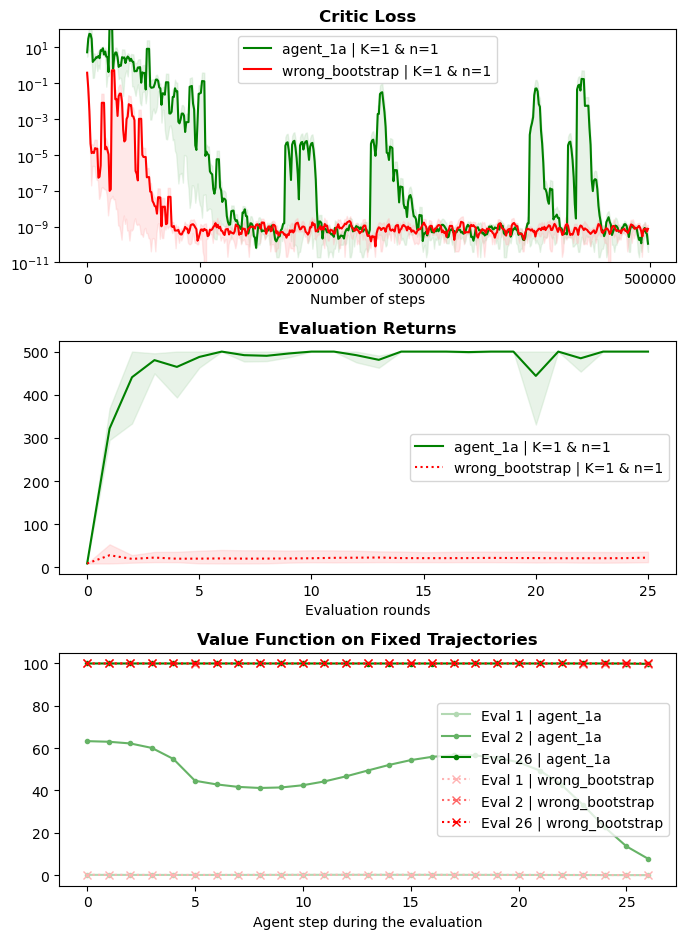

In [31]:
# Define the directory path
directory = f'figures/Questions'

# Create the directory if it does not exist
if not os.path.exists(directory):
    os.makedirs(directory)

fig_in, axs_in = plt.subplots(3, 1, figsize=(7, 10))

ylim = [1e-11, 1e2]
compare_bool = True
plot_traj = True
entropy_bool = False

plotting(fig_in, axs_in, plot_traj, n_envs_a, n_steps_per_update_a, entropy_bool, compare_bool, critic_a, eval_return_a, values_a, agents_seeds_a, id_a, color_agent = combined_colors[:3], marker_style=marker_styles[0], linestyle= linestyles[0] ,y_lim=ylim, rolling_length=3)
plotting(fig_in, axs_in, plot_traj, n_envs_b, n_steps_per_update_b, entropy_bool, compare_bool, critic_b, eval_return_b, values_b, agents_seeds_b, id_b, color_agent = combined_colors[21:24], marker_style=marker_styles[3],linestyle= linestyles[3], y_lim=ylim, rolling_length=3)

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.savefig(os.path.join(directory, f'Question_1.png'), bbox_inches='tight')
plt.show()

## Question 3 - Agent_1b


In [82]:
agent_a = 'agent_1b'

# Load the agents data through the dictionnary
dictionnary_discrete = load_agents_data("agents_data_discrete.npz")

agent_data_a = dictionnary_discrete[agent_a]; critic_a, actor_a, entrop_a, eval_return_a, values_a, agents_seeds_a, n_steps_a, stochasticity_bool_a, n_envs_a, n_steps_per_update_a, id_a, train_return_idx_a, train_returns_a = agent_data_a['critic_losses'], agent_data_a['actor_losses'], agent_data_a['entropies'], agent_data_a['evaluation_returns_seeds'], agent_data_a['values'], agent_data_a['agents_seeds'], agent_data_a['n_steps'], agent_data_a['stochasticity_bool'], agent_data_a['n_envs'], agent_data_a['n_steps_per_update'], agent_data_a['id'], agent_data_a['train_returns_idx'], agent_data_a['train_returns']

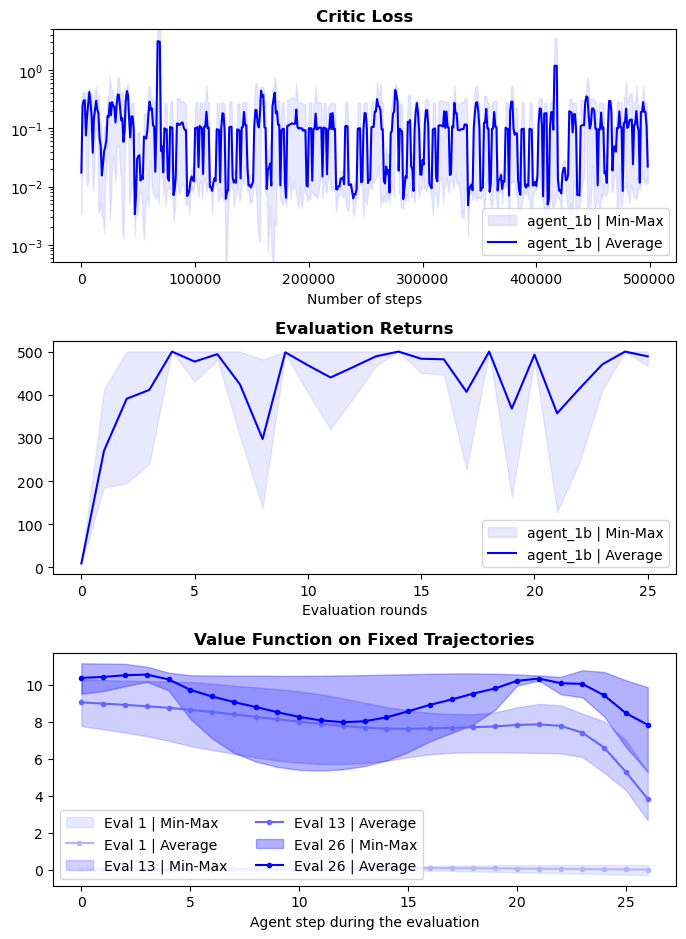

In [83]:
# Define the directory path
directory = f'figures/Questions'

# Create the directory if it does not exist
if not os.path.exists(directory):
    os.makedirs(directory)


fig_in, axs_in = plt.subplots(3, 1, figsize=(7, 10))

ylim = [5e-4, 5e0]
compare_bool = False
plot_traj = True
entropy_bool = False

plotting(fig_in, axs_in, plot_traj, n_envs_a, n_steps_per_update_a, entropy_bool, compare_bool, critic_a, eval_return_a, values_a, agents_seeds_a, id_a, color_agent = combined_colors[3:6], marker_style=marker_styles[0], linestyle= linestyles[0] ,y_lim=ylim, n_col=[1,2], rolling_length=3, loc= "lower left")

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.savefig(os.path.join(directory, f'Question_3.png'), bbox_inches='tight')
plt.show()

## Question 6 - Wallclock plotting

In [84]:
# Loading the agents training times
agent_a, agent_b, agent_c, agent_d, agent_e, agent_f, agent_g  = 'agent_1a', 'agent_1b', 'agent_2', 'agent_3', 'agent_4', 'agent_5', 'agent_6'
dictionnary_continuous = load_agents_data("agents_data_continuous.npz")

time_1a, time_1b, time_2, time_3, time_4 = dictionnary_discrete[agent_a]['training_time'], dictionnary[agent_b]['training_time'], dictionnary[agent_c]['training_time'], dictionnary[agent_d]['training_time'], dictionnary[agent_e]['training_time']
time_5, time_6 = dictionnary_continuous[agent_f]['training_time'], dictionnary_continuous[agent_g]['training_time']

agents = [agent_a, agent_b, agent_c, agent_d, agent_e, agent_f, agent_g]
training_times = [time_1a, time_1b, time_2, time_3, time_4, time_5, time_6]



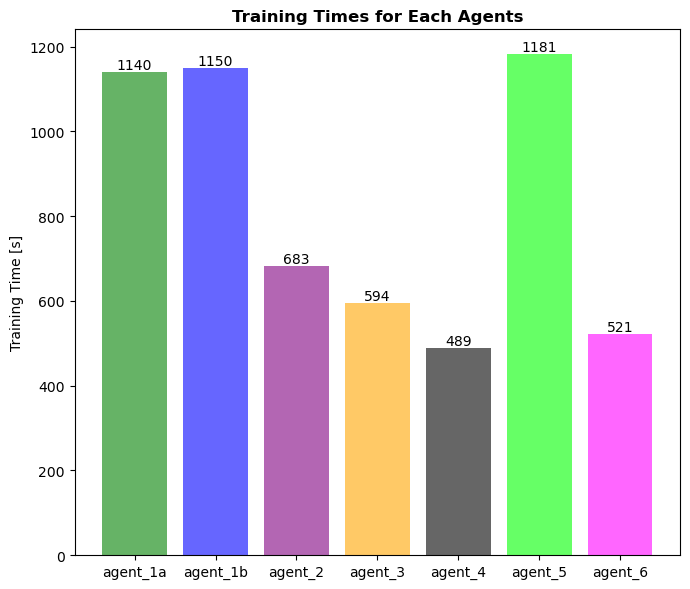

In [85]:
# Define the directory path
directory = f'figures/Questions'

# Create the directory if it does not exist
if not os.path.exists(directory):
    os.makedirs(directory)
    
plt.figure(figsize=(7, 6))

time_plots(plt, agents, training_times, colors = shaded_colors_2)

plt.tight_layout()  # Adjust layout for better fit
plt.savefig(os.path.join(directory,'Question_6_times_histogram.png'))
plt.show()

## Question 6 - Comparison Agents stochastic

In [86]:
agent_a, agent_b, agent_c, agent_d, agent_e, agent_f = 'agent_1b', 'agent_2', 'agent_3', 'agent_4', 'agent_5', 'agent_6'


# Load the agents data through the dictionnary
dictionnary_discrete = load_agents_data("agents_data_discrete.npz")
dictionnary_continuous = load_agents_data("agents_data_continuous.npz")

# Discrete agents
agent_data_a = dictionnary_discrete[agent_a]; critic_a, actor_a, entrop_a, eval_return_a, values_a, agents_seeds_a, n_steps_a, stochasticity_bool_a, n_envs_a, n_steps_per_update_a, id_a, train_return_idx_a, train_returns_a = agent_data_a['critic_losses'], agent_data_a['actor_losses'], agent_data_a['entropies'], agent_data_a['evaluation_returns_seeds'], agent_data_a['values'], agent_data_a['agents_seeds'], agent_data_a['n_steps'], agent_data_a['stochasticity_bool'], agent_data_a['n_envs'], agent_data_a['n_steps_per_update'], agent_data_a['id'], agent_data_a['train_returns_idx'], agent_data_a['train_returns']
agent_data_b = dictionnary_discrete[agent_b]; critic_b, actor_b, entrop_b, eval_return_b, values_b, agents_seeds_b, n_steps_b, stochasticity_bool_b, n_envs_b, n_steps_per_update_b, id_b, train_return_idx_b, train_returns_b = agent_data_b['critic_losses'], agent_data_b['actor_losses'], agent_data_b['entropies'], agent_data_b['evaluation_returns_seeds'], agent_data_b['values'], agent_data_b['agents_seeds'], agent_data_b['n_steps'], agent_data_b['stochasticity_bool'], agent_data_b['n_envs'], agent_data_b['n_steps_per_update'], agent_data_b['id'], agent_data_b['train_returns_idx'], agent_data_b['train_returns']
agent_data_c = dictionnary_discrete[agent_c]; critic_c, actor_c, entrop_c, eval_return_c, values_c, agents_seeds_c, n_steps_c, stochasticity_bool_c, n_envs_c, n_steps_per_update_c, id_c, train_return_idx_c, train_returns_c = agent_data_c['critic_losses'], agent_data_c['actor_losses'], agent_data_c['entropies'], agent_data_c['evaluation_returns_seeds'], agent_data_c['values'], agent_data_c['agents_seeds'], agent_data_c['n_steps'], agent_data_c['stochasticity_bool'], agent_data_c['n_envs'], agent_data_c['n_steps_per_update'], agent_data_c['id'], agent_data_c['train_returns_idx'], agent_data_c['train_returns']
agent_data_d = dictionnary_discrete[agent_d]; critic_d, actor_d, entrop_d, eval_return_d, values_d, agents_seeds_d, n_steps_d, stochasticity_bool_d, n_envs_d, n_steps_per_update_d, id_d, train_return_idx_d, train_returns_d = agent_data_d['critic_losses'], agent_data_d['actor_losses'], agent_data_d['entropies'], agent_data_d['evaluation_returns_seeds'], agent_data_d['values'], agent_data_d['agents_seeds'], agent_data_d['n_steps'], agent_data_d['stochasticity_bool'], agent_data_d['n_envs'], agent_data_d['n_steps_per_update'], agent_data_d['id'], agent_data_d['train_returns_idx'], agent_data_d['train_returns']

# Continuous agents
agent_data_e = dictionnary_continuous[agent_e]; critic_e, actor_e, entrop_e, eval_return_e, values_e, agents_seeds_e, n_steps_e, stochasticity_bool_e, n_envs_e, n_steps_per_update_e, id_e, train_return_idx_e, train_returns_e = agent_data_e['critic_losses'], agent_data_e['actor_losses'], agent_data_e['entropies'], agent_data_e['evaluation_returns_seeds'], agent_data_e['values'], agent_data_e['agents_seeds'], agent_data_e['n_steps'], agent_data_e['stochasticity_bool'], agent_data_e['n_envs'], agent_data_e['n_steps_per_update'], agent_data_e['id'], agent_data_e['train_returns_idx'], agent_data_e['train_returns']
agent_data_f = dictionnary_continuous[agent_f]; critic_f, actor_f, entrop_f, eval_return_f, values_f, agents_seeds_f, n_steps_f, stochasticity_bool_f, n_envs_f, n_steps_per_update_f, id_f, train_return_idx_f, train_returns_f = agent_data_f['critic_losses'], agent_data_f['actor_losses'], agent_data_f['entropies'], agent_data_f['evaluation_returns_seeds'], agent_data_f['values'], agent_data_f['agents_seeds'], agent_data_f['n_steps'], agent_data_f['stochasticity_bool'], agent_data_f['n_envs'], agent_data_f['n_steps_per_update'], agent_data_f['id'], agent_data_f['train_returns_idx'], agent_data_f['train_returns']


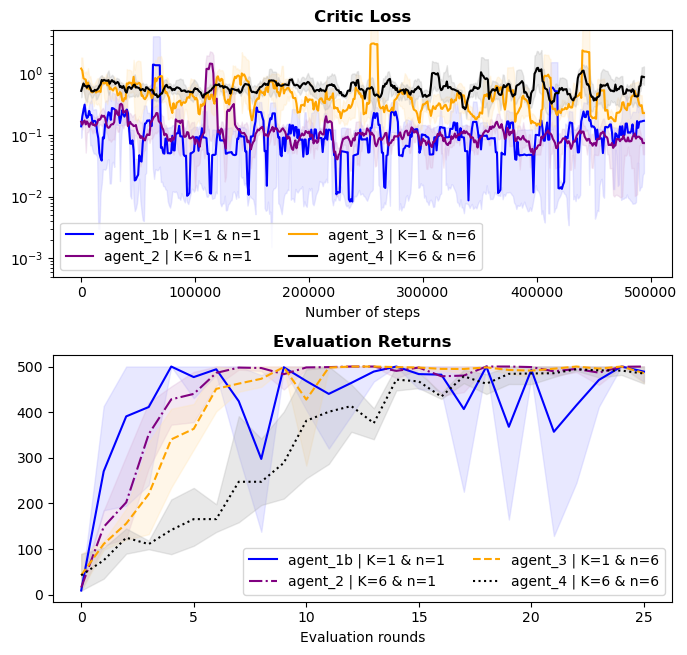

In [87]:
# Define the directory path
directory = f'figures/Questions'

# Create the directory if it does not exist
if not os.path.exists(directory):
    os.makedirs(directory)


fig_in, axs_in = plt.subplots(2, 1, figsize=(7, 7))

ylim = [5e-4, 5e0]
compare_bool = True
plot_traj = False
entropy_bool = False

plotting(fig_in, axs_in, plot_traj, n_envs_a, n_steps_per_update_a, entropy_bool, compare_bool, critic_a, eval_return_a, values_a, agents_seeds_a, id_a, color_agent = combined_colors[3:6], marker_style=marker_styles[0], linestyle= linestyles[0] ,y_lim=ylim, n_col=[2,2], rolling_length=7)
plotting(fig_in, axs_in, plot_traj, n_envs_b, n_steps_per_update_b, entropy_bool, compare_bool, critic_b, eval_return_b, values_b, agents_seeds_b, id_b, color_agent = combined_colors[6:9], marker_style=marker_styles[1],linestyle= linestyles[2], y_lim=ylim, n_col=[2,2], rolling_length=7)
plotting(fig_in, axs_in, plot_traj, n_envs_c, n_steps_per_update_c, entropy_bool, compare_bool, critic_c, eval_return_c, values_c, agents_seeds_c, id_c, color_agent = combined_colors[9:12], marker_style=marker_styles[2],linestyle= linestyles[1], y_lim=ylim, n_col=[2,2], rolling_length=7)
plotting(fig_in, axs_in, plot_traj, n_envs_d, n_steps_per_update_d, entropy_bool, compare_bool, critic_d, eval_return_d, values_d, agents_seeds_d, id_d, color_agent = combined_colors[12:15], marker_style=marker_styles[3],linestyle= linestyles[3], y_lim=ylim, n_col=[2,2], rolling_length=7)

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.savefig(os.path.join(directory, f'Question_6_comparisons.png'), bbox_inches='tight')
plt.show()

### Plotting the trajectories in the appendix

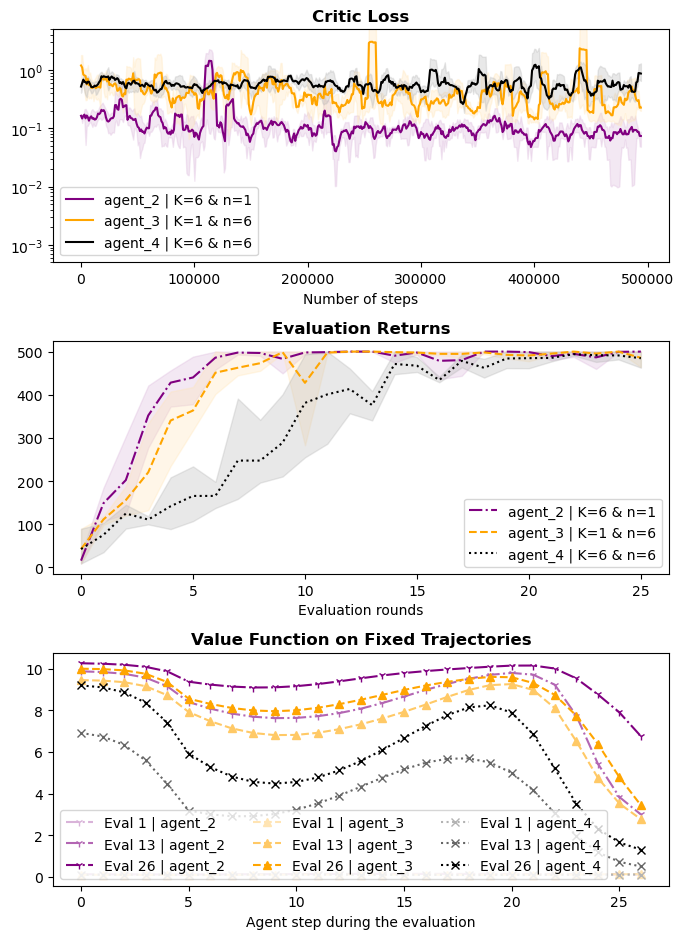

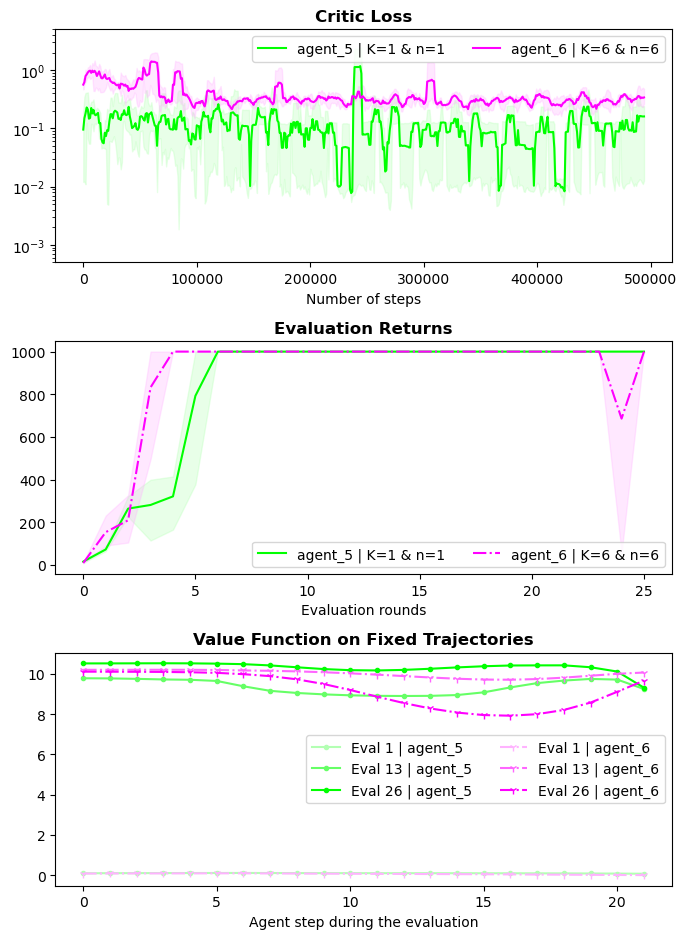

In [88]:
# Define the directory path
directory = f'figures/Questions'

# Create the directory if it does not exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Discrete agents
fig_in, axs_in = plt.subplots(3, 1, figsize=(7, 10))

ylim = [5e-4, 5e0]
compare_bool = True
plot_traj = True
entropy_bool = False

plotting(fig_in, axs_in, plot_traj, n_envs_b, n_steps_per_update_b, entropy_bool, compare_bool, critic_b, eval_return_b, values_b, agents_seeds_b, id_b, color_agent = combined_colors[6:9], marker_style=marker_styles[1],linestyle= linestyles[2], y_lim=ylim, n_col=[1,3], rolling_length=7, loc= "lower left")
plotting(fig_in, axs_in, plot_traj, n_envs_c, n_steps_per_update_c, entropy_bool, compare_bool, critic_c, eval_return_c, values_c, agents_seeds_c, id_c, color_agent = combined_colors[9:12], marker_style=marker_styles[2],linestyle= linestyles[1], y_lim=ylim, n_col=[1,3], rolling_length=7, loc= "lower left")
plotting(fig_in, axs_in, plot_traj, n_envs_d, n_steps_per_update_d, entropy_bool, compare_bool, critic_d, eval_return_d, values_d, agents_seeds_d, id_d, color_agent = combined_colors[12:15], marker_style=marker_styles[3],linestyle= linestyles[3], y_lim=ylim, n_col=[1,3], rolling_length=7, loc= "lower left")

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.savefig(os.path.join(directory, f'Annex_trajetories_discrete.png'), bbox_inches='tight')
plt.show()

# Continuous agents
fig_in, axs_in = plt.subplots(3, 1, figsize=(7, 10))

ylim = [5e-4, 5e0]
compare_bool = True
plot_traj = True
entropy_bool = False

plotting(fig_in, axs_in, plot_traj, n_envs_e, n_steps_per_update_e, entropy_bool, compare_bool, critic_e, eval_return_e, values_e, agents_seeds_e, id_e, color_agent = combined_colors[15:18], marker_style=marker_styles[0], linestyle= linestyles[0] ,y_lim=ylim, n_col=[2,2], rolling_length=7)
plotting(fig_in, axs_in, plot_traj, n_envs_f, n_steps_per_update_f, entropy_bool, compare_bool, critic_f, eval_return_f, values_f, agents_seeds_f, id_f, color_agent = combined_colors[18:21], marker_style=marker_styles[1],linestyle= linestyles[2], y_lim=ylim, n_col=[2,2], rolling_length=7)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.savefig(os.path.join(directory, f'Annex_trajetories_continuous.png'), bbox_inches='tight')
plt.show()

## Question 13 - Agents 1_b vs 4

In [89]:
agent_a = 'agent_1b'
agent_b = 'agent_4'

# Load the agents data through the dictionnary
dictionnary = load_agents_data("agents_data_discrete.npz")

agent_data_a = dictionnary[agent_a]; critic_a, actor_a, entrop_a, eval_return_a, values_a, agents_seeds_a, n_steps_a, stochasticity_bool_a, n_envs_a, n_steps_per_update_a, id_a, train_return_idx_a, train_returns_a = agent_data_a['critic_losses'], agent_data_a['actor_losses'], agent_data_a['entropies'], agent_data_a['evaluation_returns_seeds'], agent_data_a['values'], agent_data_a['agents_seeds'], agent_data_a['n_steps'], agent_data_a['stochasticity_bool'], agent_data_a['n_envs'], agent_data_a['n_steps_per_update'], agent_data_a['id'], agent_data_a['train_returns_idx'], agent_data_a['train_returns']
agent_data_b = dictionnary[agent_b]; critic_b, actor_b, entrop_b, eval_return_b, values_b, agents_seeds_b, n_steps_b, stochasticity_bool_b, n_envs_b, n_steps_per_update_b, id_b, train_return_idx_b, train_returns_b = agent_data_b['critic_losses'], agent_data_b['actor_losses'], agent_data_b['entropies'], agent_data_b['evaluation_returns_seeds'], agent_data_b['values'], agent_data_b['agents_seeds'], agent_data_b['n_steps'], agent_data_b['stochasticity_bool'], agent_data_b['n_envs'], agent_data_b['n_steps_per_update'], agent_data_b['id'], agent_data_b['train_returns_idx'], agent_data_b['train_returns']

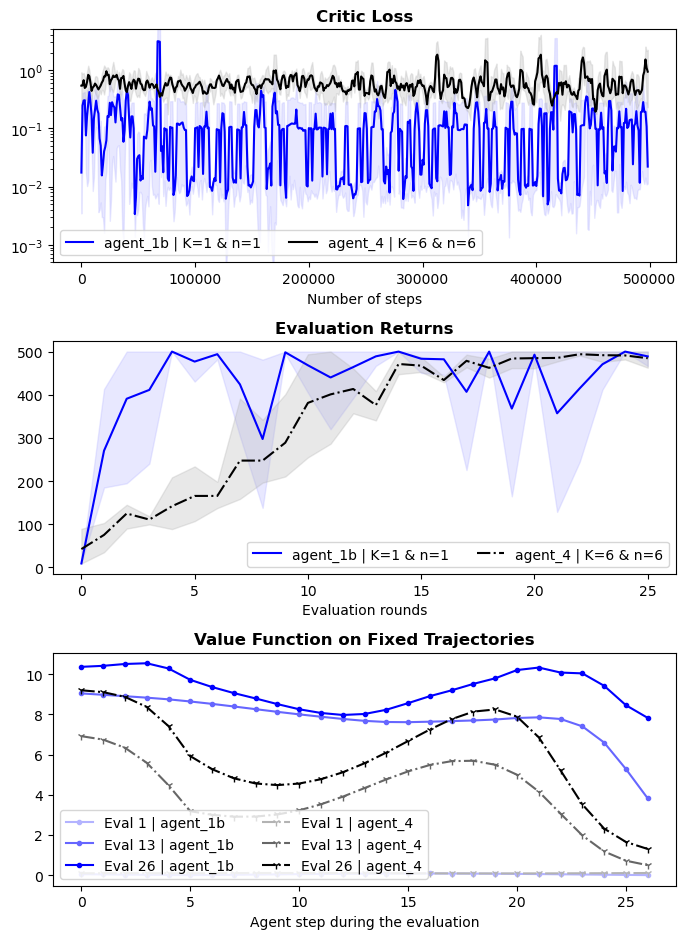

In [90]:
# Define the directory path
directory = f'figures/Questions'

# Create the directory if it does not exist
if not os.path.exists(directory):
    os.makedirs(directory)


fig_in, axs_in = plt.subplots(3, 1, figsize=(7, 10))

ylim = [5e-4, 5e0]
compare_bool = True
plot_traj = True
entropy_bool = False

plotting(fig_in, axs_in, plot_traj, n_envs_a, n_steps_per_update_a, entropy_bool, compare_bool, critic_a, eval_return_a, values_a, agents_seeds_a, id_a, color_agent = combined_colors[3:6], marker_style=marker_styles[0], linestyle= linestyles[0], y_lim=ylim, n_col=[2,2], rolling_length=3, loc = 'lower left')
plotting(fig_in, axs_in, plot_traj, n_envs_b, n_steps_per_update_b, entropy_bool, compare_bool, critic_b, eval_return_b, values_b, agents_seeds_b, id_b, color_agent = combined_colors[12:15], marker_style=marker_styles[1],linestyle= linestyles[2], y_lim=ylim, n_col=[2,2], rolling_length=3, loc = 'lower left')

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.savefig(os.path.join(directory, f'Question_13.png'), bbox_inches='tight')
plt.show()

## Question 15 - Agents 1b vs 5


In [91]:
agent_a = 'agent_1b'
agent_b = 'agent_5'

# Load the agents data through the dictionnary
dictionnary_discrete = load_agents_data("agents_data_discrete.npz")
dictionnary_continuous = load_agents_data("agents_data_continuous.npz")

agent_data_a = dictionnary_discrete[agent_a]; critic_a, actor_a, entrop_a, eval_return_a, values_a, agents_seeds_a, n_steps_a, stochasticity_bool_a, n_envs_a, n_steps_per_update_a, id_a, train_return_idx_a, train_returns_a = agent_data_a['critic_losses'], agent_data_a['actor_losses'], agent_data_a['entropies'], agent_data_a['evaluation_returns_seeds'], agent_data_a['values'], agent_data_a['agents_seeds'], agent_data_a['n_steps'], agent_data_a['stochasticity_bool'], agent_data_a['n_envs'], agent_data_a['n_steps_per_update'], agent_data_a['id'], agent_data_a['train_returns_idx'], agent_data_a['train_returns']
agent_data_b = dictionnary_continuous[agent_b]; critic_b, actor_b, entrop_b, eval_return_b, values_b, agents_seeds_b, n_steps_b, stochasticity_bool_b, n_envs_b, n_steps_per_update_b, id_b, train_return_idx_b, train_returns_b = agent_data_b['critic_losses'], agent_data_b['actor_losses'], agent_data_b['entropies'], agent_data_b['evaluation_returns_seeds'], agent_data_b['values'], agent_data_b['agents_seeds'], agent_data_b['n_steps'], agent_data_b['stochasticity_bool'], agent_data_b['n_envs'], agent_data_b['n_steps_per_update'], agent_data_b['id'], agent_data_b['train_returns_idx'], agent_data_b['train_returns']

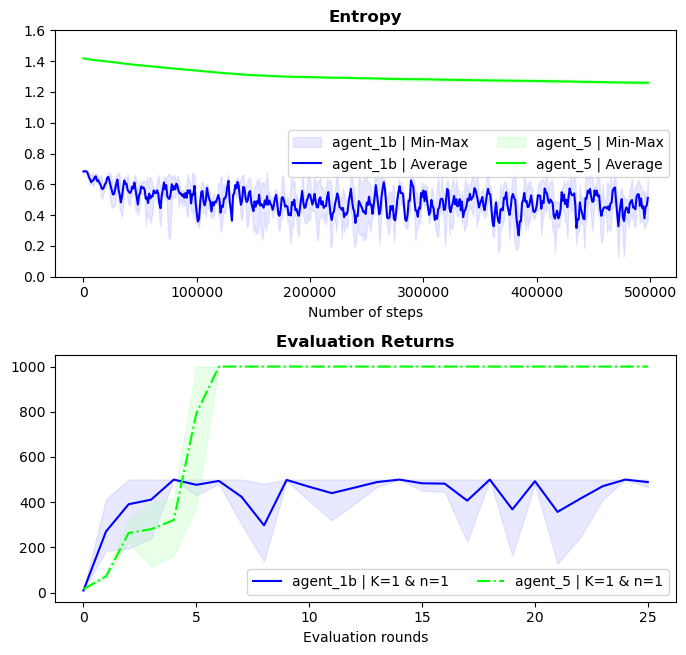

In [92]:
# Define the directory path
directory = f'figures/Questions'

# Create the directory if it does not exist
if not os.path.exists(directory):
    os.makedirs(directory)

fig_in, axs_in = plt.subplots(2, 1, figsize=(7, 7))

ylim = [0, 1.6]
compare_bool = True
entropy_bool = True
plot_traj = False

plotting(fig_in, axs_in, plot_traj, n_envs_a, n_steps_per_update_a, entropy_bool, compare_bool, critic_a, eval_return_a, values_a, agents_seeds_a, id_a, color_agent = combined_colors[3:6], marker_style=marker_styles[0], linestyle= linestyles[0] ,y_lim=ylim, n_col=[2,1], rolling_length=3, entropies = entrop_a)
plotting(fig_in, axs_in, plot_traj, n_envs_b, n_steps_per_update_b, entropy_bool, compare_bool, critic_b, eval_return_b, values_b, agents_seeds_b, id_b, color_agent = combined_colors[15:18], marker_style=marker_styles[1],linestyle= linestyles[2], y_lim=ylim, n_col=[2,1], rolling_length=3,  entropies = entrop_b)

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.savefig(os.path.join(directory, f'Question_15.png'), bbox_inches='tight')
plt.show()

### Question 17 - Agents 5 vs 6

In [93]:
agent_a = 'agent_5'
agent_b = 'agent_6'

# Load the agents data through the dictionnary
dictionnary_continuous = load_agents_data("agents_data_continuous.npz")

agent_data_a = dictionnary_continuous[agent_a]; critic_a, actor_a, entrop_a, eval_return_a, values_a, agents_seeds_a, n_steps_a, stochasticity_bool_a, n_envs_a, n_steps_per_update_a, id_a, train_return_idx_a, train_returns_a = agent_data_a['critic_losses'], agent_data_a['actor_losses'], agent_data_a['entropies'], agent_data_a['evaluation_returns_seeds'], agent_data_a['values'], agent_data_a['agents_seeds'], agent_data_a['n_steps'], agent_data_a['stochasticity_bool'], agent_data_a['n_envs'], agent_data_a['n_steps_per_update'], agent_data_a['id'], agent_data_a['train_returns_idx'], agent_data_a['train_returns']
agent_data_b = dictionnary_continuous[agent_b]; critic_b, actor_b, entrop_b, eval_return_b, values_b, agents_seeds_b, n_steps_b, stochasticity_bool_b, n_envs_b, n_steps_per_update_b, id_b, train_return_idx_b, train_returns_b = agent_data_b['critic_losses'], agent_data_b['actor_losses'], agent_data_b['entropies'], agent_data_b['evaluation_returns_seeds'], agent_data_b['values'], agent_data_b['agents_seeds'], agent_data_b['n_steps'], agent_data_b['stochasticity_bool'], agent_data_b['n_envs'], agent_data_b['n_steps_per_update'], agent_data_b['id'], agent_data_b['train_returns_idx'], agent_data_b['train_returns']

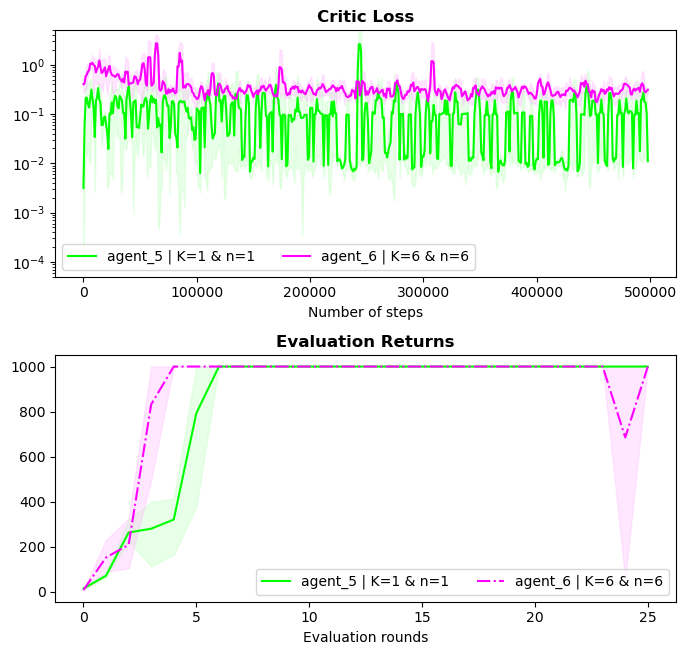

In [94]:
# Define the directory path
directory = f'figures/Questions'

# Create the directory if it does not exist
if not os.path.exists(directory):
    os.makedirs(directory)

fig_in, axs_in = plt.subplots(2, 1, figsize=(7, 7))

ylim = [5e-5, 5e0]
compare_bool = True
entropy_bool = False
plot_traj = False

plotting(fig_in, axs_in, plot_traj, n_envs_a, n_steps_per_update_a, entropy_bool, compare_bool, critic_a, eval_return_a, values_a, agents_seeds_a, id_a, color_agent = combined_colors[15:18], marker_style=marker_styles[0], linestyle= linestyles[0] ,y_lim=ylim, n_col=[2,2], rolling_length=3, entropies = entrop_a, loc = 'lower right')
plotting(fig_in, axs_in, plot_traj, n_envs_b, n_steps_per_update_b, entropy_bool, compare_bool, critic_b, eval_return_b, values_b, agents_seeds_b, id_b, color_agent = combined_colors[18:21], marker_style=marker_styles[1],linestyle= linestyles[2], y_lim=ylim, n_col=[2,2], rolling_length=3,  entropies = entrop_b, loc = 'lower right')

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.savefig(os.path.join(directory, f'Question_17.png'), bbox_inches='tight')
plt.show()

## Question 18 - Agent 5 with actor_lr = 3e-4


In [95]:
agent_a = 'agent_5'
agent_b = 'agent_5_high_lr'

# Load the agents data through the dictionnary
dictionnary_continuous = load_agents_data("agents_data_continuous.npz")

agent_data_a = dictionnary_continuous[agent_a]; critic_a, actor_a, entrop_a, eval_return_a, values_a, agents_seeds_a, n_steps_a, stochasticity_bool_a, n_envs_a, n_steps_per_update_a, id_a, train_return_idx_a, train_returns_a = agent_data_a['critic_losses'], agent_data_a['actor_losses'], agent_data_a['entropies'], agent_data_a['evaluation_returns_seeds'], agent_data_a['values'], agent_data_a['agents_seeds'], agent_data_a['n_steps'], agent_data_a['stochasticity_bool'], agent_data_a['n_envs'], agent_data_a['n_steps_per_update'], agent_data_a['id'], agent_data_a['train_returns_idx'], agent_data_a['train_returns']
agent_data_b = dictionnary_continuous[agent_b]; critic_b, actor_b, entrop_b, eval_return_b, values_b, agents_seeds_b, n_steps_b, stochasticity_bool_b, n_envs_b, n_steps_per_update_b, id_b, train_return_idx_b, train_returns_b = agent_data_b['critic_losses'], agent_data_b['actor_losses'], agent_data_b['entropies'], agent_data_b['evaluation_returns_seeds'], agent_data_b['values'], agent_data_b['agents_seeds'], agent_data_b['n_steps'], agent_data_b['stochasticity_bool'], agent_data_b['n_envs'], agent_data_b['n_steps_per_update'], agent_data_b['id'], agent_data_b['train_returns_idx'], agent_data_b['train_returns']

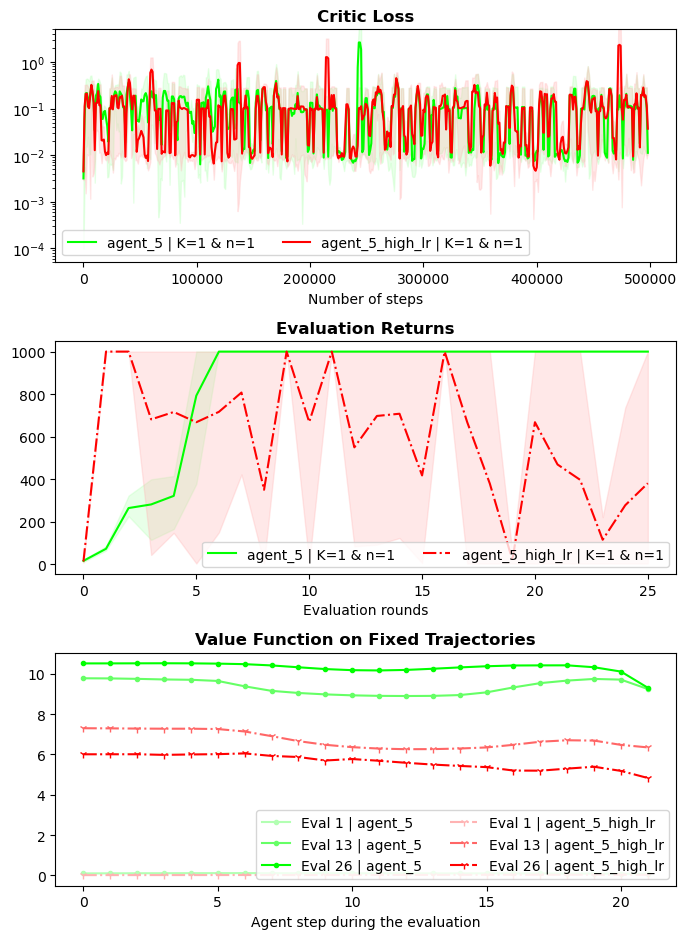

In [96]:
# Define the directory path
directory = f'figures/Questions'

# Create the directory if it does not exist
if not os.path.exists(directory):
    os.makedirs(directory)

fig_in, axs_in = plt.subplots(3, 1, figsize=(7, 10))

compare_bool = True
entropy_bool = False
plot_traj = True

plotting(fig_in, axs_in, plot_traj, n_envs_a, n_steps_per_update_a, entropy_bool, compare_bool, critic_a, eval_return_a, values_a, agents_seeds_a, id_a, color_agent = combined_colors[15:18], marker_style=marker_styles[0], linestyle= linestyles[0] ,y_lim=ylim, n_col=[2,2], rolling_length=3, entropies = entrop_a, loc = 'lower right')
plotting(fig_in, axs_in, plot_traj, n_envs_b, n_steps_per_update_b, entropy_bool, compare_bool, critic_b, eval_return_b, values_b, agents_seeds_b, id_b, color_agent = combined_colors[21:24], marker_style=marker_styles[1],linestyle= linestyles[2], y_lim=ylim, n_col=[2,2], rolling_length=3,  entropies = entrop_b, loc = 'lower right')

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.savefig(os.path.join(directory, f'Question_18.png'), bbox_inches='tight')
plt.show()